# 13. Seaborn introduction

We now switch to another plotting library particularly popular for statistics. It is built *on top of Matplotlib* so you will see that you can re-use a lot of what you have just learned. The creation of plots and the way to handle data input is however very different, with Matplotlib being very explicity (and lengthy) while Seaborn is implicit.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
diams = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/Ecdat/Diamond.csv')

For the sake of simpicity, we only keep three colours from the dataset:

In [12]:
diams = diams[(diams['colour']=='D') | (diams['colour']=='E') | (diams['colour']=='G')]

## Matplotlib vs. Seaborn

Let's remember how we plotted the price vs. carat in Matplotlib and want a different marker for each colour:

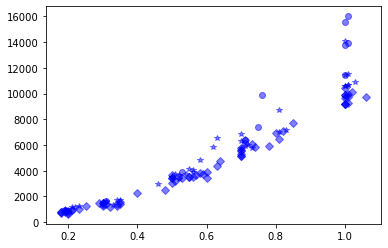

In [13]:
fig, ax = plt.subplots()
ax.plot(diams[diams['colour']=='D']['carat'], diams[diams['colour']=='D']['price'], 'bo', alpha=.5);
ax.plot(diams[diams['colour']=='E']['carat'], diams[diams['colour']=='E']['price'], 'b*', alpha=.5);
ax.plot(diams[diams['colour']=='G']['carat'], diams[diams['colour']=='G']['price'], 'bD', alpha=.5);

In seaborn, we don't have to manually "isolate" each colour. We can simply indicate:

1. which DataFrame we want to use as ```data``` source
2. which columns from the DataFrame should be represented on the ```x``` and ```y``` axis
3. **how the dimanond colour variable should be represented**, e.g. as colour or marker ```style```

We can pass all these parameters to the ```scatterplot``` function:

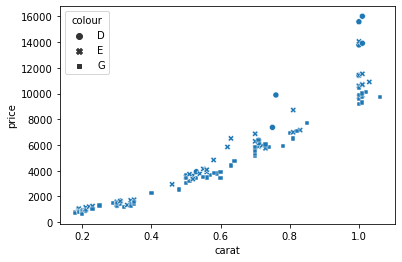

In [14]:
ax = sns.scatterplot(data=diams, x='carat', y='price', style='colour');

As you can see, in addition of getting all data plotted at once with a specific marker, we get automated labelling of both axis using the column label as well as a legend.


## Interaction with Matplotlib

Previously we always created first a figure and axis object. seaborn automatically creates an axis object, but if we want to come back to our previous logic, we can **directly pass an existing ax object to the seaborn function** and come back to our previous notation. Then we can use these as usual, for example to add a title, set formats etc.:

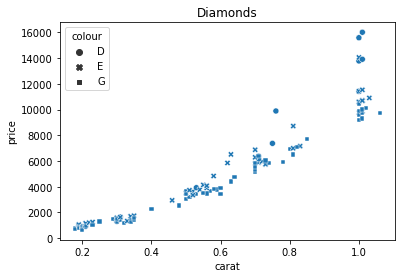

In [15]:
fig, ax = plt.subplots()
ax = sns.scatterplot(data=diams, x='carat', y='price', style='colour', ax=ax);
ax.set_title('Diamonds');

## Categorical variables

In the example above we used the ```colour``` column to assign a specific marker in the plot. The ```colour``` here represents a *category* in contrast to the weight for example which is a continuous variable. Categorical variables can be used to set different aspects of the plot also often called *aesthetics* (in ggplot for example). We have already seen the marker above, but it can also be the color called ```hue``` in seaborn:

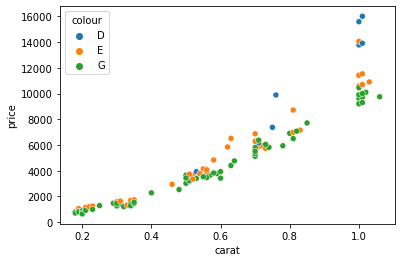

In [16]:
fig, ax = plt.subplots()
ax = sns.scatterplot(data=diams, x='carat', y='price', hue='colour', ax=ax);

or it can even be both:

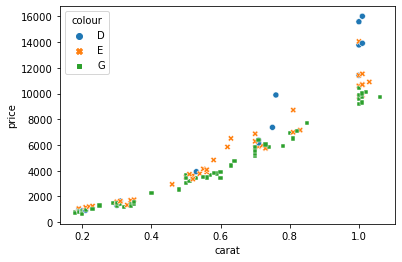

In [17]:
fig, ax = plt.subplots()
ax = sns.scatterplot(data=diams, x='carat', y='price', hue='colour', style='colour', ax=ax);

Finally, we can also use a variable to define the size of the marker, even though in this case it doesn't make much sense to use the color to define the size:

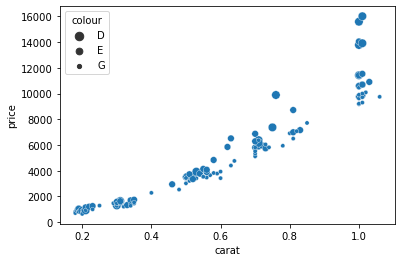

In [18]:
fig, ax = plt.subplots()
ax = sns.scatterplot(data=diams, x='carat', y='price', size='colour', ax=ax);

Note that sometimes we want to use a numerical columns as a category. For example we can add a random column to the dataframe and use it for coloring:

In [20]:
diams['random'] = np.random.randint(0,3, len(diams))

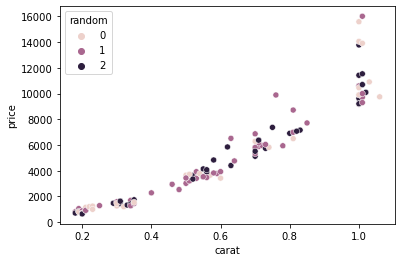

In [21]:
fig, ax = plt.subplots()
ax = sns.scatterplot(data=diams, x='carat', y='price', hue='random', ax=ax);

We see that since seaborn believes it is dealing with a numerical feature, the color scale is progressive and not ideal to distinguish actual categories. In such a case we can explicitly change the column to a category thanks to Pandas:

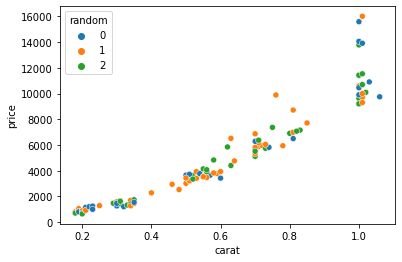

In [22]:
diams['random'] = pd.Categorical(diams['random'])
fig, ax = plt.subplots()
ax = sns.scatterplot(data=diams, x='carat', y='price', hue='random', ax=ax);

## Other inputs

We have seen until now how we could plot data from a DataFrame. However sometimes we want to use seaborn if we only have for example Numpy arrays. For example we have ```x``` values, a function that generates ```y = x**2``` values and an array that contains categories ```cat```:

In [6]:
x_array = np.arange(0, 10, 0.5)
y_array = x_array ** 2
cat = np.random.randint(0,3,len(y_array))

Now we can simply directly pass the arrays:

<AxesSubplot:>

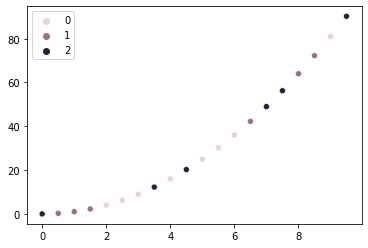

In [8]:
sns.scatterplot(x=x_array, y=y_array, hue=cat)

Here again, we could turn the ```cat``` array into an actual category so that the color map is better suited:

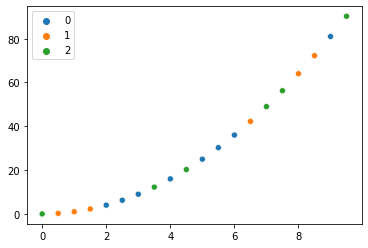

In [24]:
sns.scatterplot(x=x_array, y=y_array, hue=pd.Categorical(cat));

If we still want to enjoy the seaborn "goodies" such as automated axis labeling, we can also use a dictionary as input:

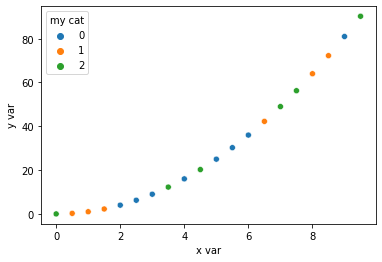

In [25]:
sns.scatterplot(data = {'x var': x_array, 'y var': y_array, 'my cat': pd.Categorical(cat)},
                x= 'x var', y='y var', hue='my cat');
                        

## Combining aesthetics

We can go one step further now and use simultaneously different groupings. For example we can assign the diamond color to ```hue``` and the clarity to the ```style```:

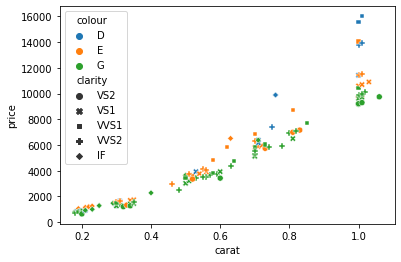

In [10]:
fig, ax = plt.subplots()
ax = sns.scatterplot(data=diams, x='carat', y='price', hue='colour', style='clarity', ax=ax);

## Other plots

All plots in seaborn share the same logic. For example if we want to do a histogram of weigth by color we can use the 


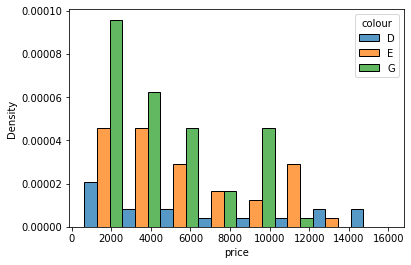

In [11]:
sns.histplot(data=diams, x='price', hue='colour', multiple='dodge', stat='density',)

## Adjusting colours
For almost every plot in seaborn, you can easily adjust the colour palette by using the ```palette``` option and use one of the [Matplotlib colour maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html). For example we can change the histogram above to. Seaborn offers a [very good discussion](https://seaborn.pydata.org/tutorial/color_palettes.html) of which type of palette is most appropriate for each type of data.

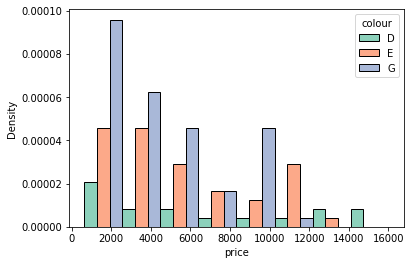

In [15]:
sns.histplot(data=diams, x='price', hue='colour', multiple='dodge', stat='density', palette='Set2');

You can also directly visualize palettes using the ```color_palette``` function to help you choosing:

In [16]:
sns.color_palette('Set3')

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

## Adjusting other properties

Most of the time, seaborn has specific command to affect how data points are rendered. For example, you can override the default markers selected in a scatter plot:

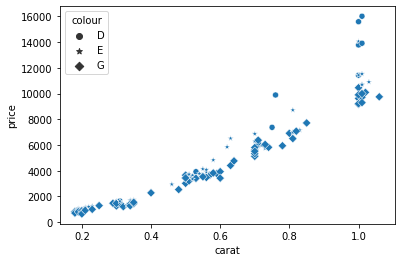

In [29]:
fig, ax = plt.subplots()
ax = sns.scatterplot(data=diams, x='carat', y='price', style='colour', ax=ax, markers=['o','*','D']);

In most cases you can also in principle use the options that are available in the underlying Matplotlib function. You will see options called ```kwargs``` and a message like this for example for the ```scatterplot```:

```kwargs : key, value mappings
    Other keyword arguments are passed down to
    matplotlib.axes.Axes.scatter.```

For example we can use the ```s``` option to set the marker size and ```edegcolor``` and ```facecolor``` to change makers colours:

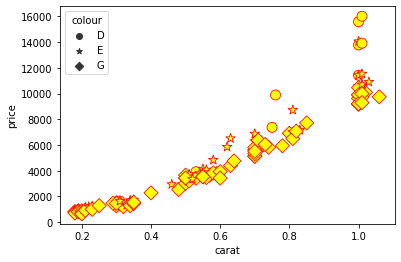

In [50]:
fig, ax = plt.subplots()
ax = sns.scatterplot(data=diams, x='carat', y='price', style='colour', ax=ax, markers=['o','*','D'],
                     facecolor='yellow', s = 100, edgecolor='red');

## Exercise

Create a scatter plot of the ```body_mass_g``` vs ```bill_depth_mm``` using color and markers to distinguish species and sex as shown below. Try different ```palette```:

Also fix the labels and add a title.

![](https://github.com/guiwitz/ISDAwPython_day2/raw/master/plots/ex_15_1.png)

In [12]:
penguins = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')